<a href="https://colab.research.google.com/github/Maxxx-VS/CV-Arduino/blob/main/Robot_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications import MobileNet
conv_base = MobileNet(include_top=False, input_shape = (150, 150, 3))

<ipython-input-1-e690f561c0d9>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  conv_base = MobileNet(include_top=False, input_shape = (150, 150, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
import os
import shutil
from keras import layers
from keras import models
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [3]:
conv_base.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 75, 75, 32)          │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 75, 75, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 75, 75, 32)          │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 75, 75, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 75, 75, 64)          │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 75, 75, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 76, 76, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 37, 37, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 37, 37, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 37, 37, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 37, 37, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 37, 37, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 37, 37, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 37, 37, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [4]:
!wget https://storage.yandexcloud.net/academy.ai/cat-and-dog.zip
!unzip -qo "cat-and-dog" -d ./temp

IMAGE_PATH = './temp/training_set/training_set/'
BASE_DIR = './dataset/'
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))
CLASS_COUNT = len(CLASS_LIST)
if os.path.exists(BASE_DIR):
    shutil.rmtree(BASE_DIR)

os.mkdir(BASE_DIR)
train_dir = os.path.join(BASE_DIR, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(BASE_DIR, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(BASE_DIR, 'test')
os.mkdir(test_dir)

def create_dataset(
    img_path: str,         # Путь к файлам с изображениями классов
    new_path: str,         # Путь к папке с выборками
    class_name: str,       # Имя класса (оно же и имя папки)
    start_index: int,      # Стартовый индекс изображения, с которого начинаем подвыборку
    end_index: int         # Конечный индекс изображения, до которого создаем подвыборку

):

    src_path = os.path.join(img_path, class_name)  # Полный путь к папке с изображениями класса
    dst_path = os.path.join(new_path, class_name)  # Полный путь к папке с новым датасетом класса
    class_files = os.listdir(src_path)
    os.mkdir(dst_path)

    for fname in class_files[start_index : end_index]:
        src = os.path.join(src_path, fname)
        dst = os.path.join(dst_path, fname)
        shutil.copyfile(src, dst)

for class_label in range(CLASS_COUNT):    # Перебор по всем классам по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен

    create_dataset(IMAGE_PATH, train_dir, class_name, 0, 2000)
    create_dataset(IMAGE_PATH, validation_dir, class_name, 2000, 3000)
    create_dataset(IMAGE_PATH, test_dir, class_name, 3000, 4000)

--2025-02-23 00:13:10--  https://storage.yandexcloud.net/academy.ai/cat-and-dog.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228082266 (218M) [application/x-zip-compressed]
Saving to: ‘cat-and-dog.zip’

cat-and-dog.zip     100%[===================>] 217.52M  15.1MB/s    in 16s     

2025-02-23 00:13:27 (13.7 MB/s) - ‘cat-and-dog.zip’ saved [228082266/228082266]



In [5]:
datagen = ImageDataGenerator(rescale=1./255) # Задаем генератор и нормализуем данные делением на 255
batch_size = 20 # Размер батча (20 изображений)


def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 1024))
    labels = np.zeros(shape=(sample_count))

    generator = datagen.flow_from_directory(
        directory,                # путь к папке
        target_size=(150, 150),   # изменить картинки до размера 150 х 150
        batch_size=batch_size,    # размер пакета
        class_mode='binary'       # задача бинарной классификации
    )
    i = 0
    for inputs_batch, labels_batch in generator: # в цикле пошагово генерируем пакет с картинками и пакет из меток
        features_batch = conv_base.predict(inputs_batch, verbose=0) # делаем предсказание на сгенерируемом пакете
        features[i * batch_size : (i + 1) * batch_size] = features_batch # складываем пакеты с признаками пачками в массив с признаками

        labels[i * batch_size : (i + 1) * batch_size] = labels_batch     # складываем пакеты с метками в массив с метками
        i += 1

        if i * batch_size >= sample_count: # Прерываем генерацию, когда выходим за число желаемых примеров
            break

    return features, labels # возвращаем кортеж (признаки, метки)

train_features, train_labels = extract_features(train_dir, 4000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [6]:
train_features = np.reshape(train_features, (4000, 4 * 4 * 1024))              # приводим к форме (образцы, 8192) обучающие признаки
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 1024))    # приводим к форме (образцы, 8192) проверочные признаки
test_features = np.reshape(test_features, (1000, 4 * 4 * 1024))                # приводим к форме (образцы, 8192) тестовые признаки

In [7]:
model = models.Sequential()

model.add(layers.Input(shape=(4 * 4 * 1024,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5)) # Добавим прореживание для борьбы с переобучением
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    loss='binary_crossentropy',
    metrics=['acc'])

history = model.fit(
    train_features, train_labels,
    epochs=20,
    batch_size=20,
    validation_data=(validation_features, validation_labels))

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.8474 - loss: 0.4922 - val_acc: 0.9650 - val_loss: 0.0929
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9604 - loss: 0.1070 - val_acc: 0.9690 - val_loss: 0.0873
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9719 - loss: 0.0767 - val_acc: 0.9700 - val_loss: 0.0863
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9898 - loss: 0.0385 - val_acc: 0.9710 - val_loss: 0.0871
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9912 - loss: 0.0253 - val_acc: 0.9660 - val_loss: 0.0938
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9925 - loss: 0.0187 - val_acc: 0.9640 - val_loss: 0.1238
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9938 - loss: 0.0147 - val_acc: 0.9670 - val_loss: 0.1059
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9967 - loss: 0.0065 - val_acc: 0.9700 - val_loss: 0.1044
Epoch 9/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

In [8]:
def show_history(store):
    global acc
    global val_acc
    acc = store.history['acc']
    val_acc = store.history['val_acc']
    loss = store.history['loss']
    val_loss = store.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'r', label='Точность на обучающей выборке')
    plt.plot(epochs, val_acc, 'bo', label='Точность на проверочной выборке')
    plt.title('График точности на проверочной и обучающей выборках')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'r', label='Потери на обучающей выборке')
    plt.plot(epochs, val_loss, 'bo', label='Потери на проверочной выборке')
    plt.title('График потерь на проверочной и обучающей выборках')
    plt.legend()
    plt.show()

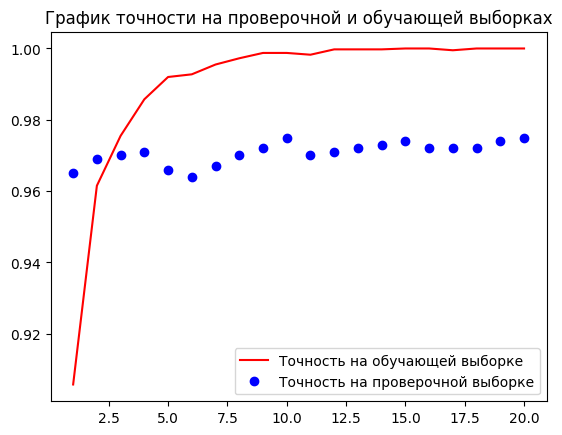

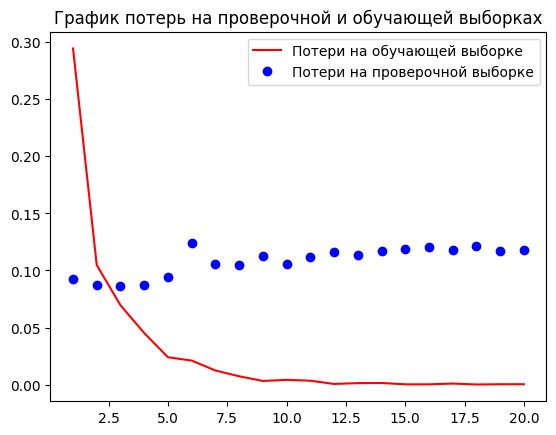

In [9]:
show_history(history)

In [10]:
model.save('model_manipulator_v1.keras')

In [35]:
# from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Загрузка модели
# model = load_model('my_model.keras')

# Загрузка и предобработка изображения
image_path = '/content/444.jpeg'
img = image.load_img(image_path, target_size=(128, 128), color_mode='grayscale')  # Изменение размера и цвета
img_array = image.img_to_array(img) / 255.0  # Нормализация
img_array = np.expand_dims(img_array, axis=0)  # Добавление размерности батча
img_array = img_array.reshape(1, -1)  # Преобразует в (1, 128*128*1 = 16384)

# Проверка формы входных данных
print("Input shape:", img_array.shape)
print("Model input shape:", model.input_shape)

# Получение предсказания
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class: {predicted_class}")

Input shape: (1, 16384)
Model input shape: (None, 16384)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted class: [0]
